In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [80]:
dt_hoje = '2024-08-08'

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Funções

In [82]:
def drop_unnamed_cols(df):
    cols = df.columns
    cols_unnamed = [col for col in cols if str(col).startswith('Unnamed')]

    columns_to_drop = df[cols_unnamed].dropna(axis=1, how='all').columns

    return df.drop(columns=columns_to_drop)



def drop_null_cols(df):
    return df.dropna(axis=1, how='all')



def read_all_tables(dirname):
    all_dfs = {}

    list_files = os.listdir(dirname)

    for file_ in list_files:
        if file_.endswith(".csv"):
            file_name = os.path.splitext(file_)[0]
            df = pd.read_csv(os.path.join(dirname, file_))
            df_cleanned = drop_unnamed_cols(df)
            df_cleanned = drop_null_cols(df_cleanned)
            all_dfs[file_name] = df_cleanned

            print(file_)

    return all_dfs



def print_keys_with_column(data_dict, column_name):
    for key, df in data_dict.items():
        if column_name in df.columns:
            print(key)



def print_keys_with_column_like(data_dict, column_name_like):
    for key, df in data_dict.items():
        matching_columns = [col for col in df.columns if column_name_like in col]
        if matching_columns:
            print(key)



def search_tables_use_column(ls_data_dict, type_search, column_name):
    if type_search == 'like':
        for dict_data in ls_data_dict:
            print_keys_with_column_like(dict_data, column_name)
    elif type_search == 'exact':
        for dict_data in ls_data_dict:
            print_keys_with_column(dict_data, column_name)
    else:
        raise ValueError("Tipo de busca não suportado. Use 'like' ou 'exact'.")



def plot_qtd_stack_bar(df, x, y, group, figsize=(20,10), colors=None):
    # Se a group for nulo o gráfico de barras pode ver utilizado sem criar grupos dentro das barras
    if group:
        agg_tips = df.groupby([x, group])[y].count().unstack().fillna(0)
    else:
        agg_tips = df.groupby([x])[y].count().fillna(0).to_frame()

    fig, ax = plt.subplots(figsize=figsize)

    # colors = ['#008080', '#DAA520','#8A2BE2','#0000FF']
    if colors:
        pass
    else:
        colors = [None for i in range(agg_tips.shape[1])]

    bottom = np.zeros(len(agg_tips))

    lst_index = [str(i) for i in agg_tips.index]

    for i, col in enumerate(agg_tips.columns):
        ax.bar(
          lst_index, agg_tips[col], bottom=bottom, label=col, edgecolor = "black", color=colors[i]) #, color=colors[i]
        bottom += np.array(agg_tips[col])

    # Coloca o label de qtd de observações acima das barras.
    totals = agg_tips.sum(axis=1)
    lst_index_total = [str(i) for i in totals.index]
    y_offset = 5
    for i, total in enumerate(totals):
        ax.text(lst_index_total[i], total + y_offset, round(total), ha='center', weight='bold')

    # Se group é nulo não colocamos o label de qtd de observações dentro da barra
    if group:
        # Let's put the annotations inside the bars themselves by using a
        # negative offset.
        y_offset = -100
        # For each patch (basically each rectangle within the bar), add a label.
        for bar in ax.patches:
            ax.text(
                # Put the text in the middle of each bar. get_x returns the start
                # so we add half the width to get to the middle.
                bar.get_x() + bar.get_width() / 2,
                # Vertically, add the height of the bar to the start of the bar,
                # along with the offset.
                bar.get_y() + bar.get_height() / 2, #bar.get_height() + bar.get_y() + y_offset,
                # This is actual value we'll show.
                round(bar.get_height()),
                # Center the labels and style them a bit.
                ha='center',
                color='w',
                weight='bold',
                size=8
            )

        ax.set_title(f'Qtd de {y} por {group}')
        ax.legend()
        plt.xticks(rotation=90)

    else:
        ax.set_title(f'Qtd de {y}')
        ax.legend()
        plt.xticks(rotation=90)



def plot_porcentagem_stack_bar(df, x, y, group, figsize=(20,10)):
    agg_tips = df.groupby([x, group])[y].count().unstack().fillna(0)
    totals = agg_tips.sum(axis=1)
    agg_tips = agg_tips.div(totals, axis='index').mul(100)

    fig, ax = plt.subplots(figsize=figsize)

    # colors = ['#008080', '#DAA520','#8A2BE2','#0000FF']
    bottom = np.zeros(len(agg_tips))

    lst_index = [str(i) for i in agg_tips.index]

    for i, col in enumerate(agg_tips.columns):
        ax.bar(
          lst_index, agg_tips[col], bottom=bottom, label=col, edgecolor = "black") # , color=colors[i]

        bottom += np.array(agg_tips[col])

    # For each patch (basically each rectangle within the bar), add a label.
    for bar in ax.patches:
        ax.text(
            # Put the text in the middle of each bar. get_x returns the start
            # so we add half the width to get to the middle.
            bar.get_x() + bar.get_width() / 2,
            # Vertically, add the height of the bar to the start of the bar,
            # along with the offset.
            bar.get_y() + bar.get_height() / 2, #bar.get_height() + bar.get_y() + y_offset,
            # This is actual value we'll show.
            round(bar.get_height()),
            # Center the labels and style them a bit.
            ha='center',
            color='w',
            weight='bold',
            size=8
        )

    ax.set_title(f'Porcentagem de matriculas por {group}')
    ax.legend()
    plt.xticks(rotation=90)


# Lendo todas as tabelas

In [83]:
TbOutras = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/Outras tabelas/")
TbAbatimento = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbAbatimento/Originais anonimizados")
TbAlunos = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbAluno/Originais anonimizados")
TbCampoDinamico = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbCampoDinamico/Originais anonimizados")
TbCaptacao = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbCaptacao/Originais anonimizados")
TbDiario = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbDiario/Originais anonimizados")
TbFase = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbFase/Originais anonimizados")
TbHistorico = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbHistorico/Originais anonimizados")
TbMeta = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbMeta")
TbProfessor = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbProfessor/Originais anonimizados")
TbResponsavel = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbResponsavel/Originais anonimizados")
TbSerie = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbSerie/Originais anonimizados")
TbSituacaoAlunoDisciplina = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbSituacaoAlunoDisciplina/Originais anonimizados")
TbTurma = read_all_tables("/content/drive/MyDrive/Pos tech/datathon/csv_output/Tabelas/TbTurma/Originais anonimizados")
lst_todos_dados = [TbOutras, TbAbatimento, TbAlunos, TbCampoDinamico, TbCaptacao, TbDiario, TbFase, TbHistorico, TbMeta, TbProfessor, TbResponsavel, TbSerie, TbSituacaoAlunoDisciplina, TbTurma]

DictTodasTabelas = (TbOutras | TbAbatimento | TbAlunos | TbCampoDinamico | TbCaptacao | TbDiario | TbFase | TbHistorico | TbMeta | TbProfessor | TbResponsavel | TbSerie | TbSituacaoAlunoDisciplina | TbTurma)

TbPais.csv
TbMunicipio.csv
TbDisciplina.csv
TbCentroResultado.csv
TbPeriodo.csv
TbMotivoInativacao.csv
TbFormaIngresso.csv
TbFreqQuadroHorario.csv
TbCursoFases.csv
TbTipoOcorrencia.csv
TbGradeCurricular.csv
TbAbatimentoTipo.csv
TbAbatimento.csv
TbAlunoRotinaEducacaoInfantil.csv
TbAlunoTurmaHistorico.csv
TbAlunoProprioResponsavel.csv
TbAlunoObs.csv
TbAluno.csv
TbAlunoTurma.csv
TbCampoDinamicoConjuntoElemento.csv
TbCampoDinamico.csv
TbCampoDinamicoConjunto.csv
TbCaptacaoCursoInteresse.csv
TbCaptacaoMotivoDesistencia.csv
TbCaptacaoSituacaoLead.csv
TbCaptacaoOrigemLead.csv
TbDiarioFrequencia.csv
TbDiarioAluno.csv
TbDiario.csv
TbDiarioAula.csv
TbFaseNotaAluno.csv
TbFaseNota.csv
TbFaseNotaDisciplinaTurma.csv
TbFaseNotaOrigemDestino.csv
TbHistorico.csv
TbHistoricoNotas.csv
TbMeta.csv
TbMetaFaseNota.csv
TbMetaFaseNotaAluno.csv
TbMetaSituacaoAlunoDisciplina.csv
TbTipoMeta.csv
TbMetaConceito.csv
TbProfessorDisciplina.csv
TbProfessorHorario.csv
TbProfessor.csv
TbTipoVinculoAlunoResponsavel.csv
Tb

In [113]:
# Dataframes importantes
alunos_turmas_df = TbAlunos['TbAlunoTurma']
alunos_df = TbAlunos['TbAluno']
alunos_turmas_hist_df = TbAlunos['TbAlunoTurmaHistorico']
disciplinas_df = TbSerie['TbSerie']
turmas_df = TbTurma['TbTurma']
situacao_aluno_turma_df = TbTurma['TbSituacaoAlunoTurma']
motivos_inat_df = TbOutras['TbMotivoInativacao']

In [114]:
alunos_turmas_hist_df.head()

,IdAluno,DataOcorrencia,IdTurma,IdSituacaoAlunoTurma,IdUsuario
0,1,2022-02-14 14:21:16.343000,275,1.0,299
1,1,2022-02-21 17:14:02.880000,275,NaN,299
2,2,2020-06-23 09:23:28.770000,35,1.0,11
3,2,2021-07-21 16:57:05.170000,53,1.0,13
4,2,2021-07-22 16:33:40.257000,53,9.0,13


In [116]:
alunos_turmas_df.head()

,IdTurma,IdAluno,IdSituacaoAlunoTurma,DataSituacaoAtivo,DataSituacaoInativo,OrdemChamada,DataHoraEfetivacaoMatricula,IdUsuarioEfetivacaoMatricula,ProblemaAutorizadoMatricula,IdUsuarioAutorizacaoMatricula,StAlunoTurmaNaoPermitePParcial,IdResponsavelFinanceiro,IdTipoResponsavelFinanceiro,IdResponsavelSecundario,IdTipoResponsavelSecundario,IdMotivoInativacao,ComentarioInativacao,IdPlanoPagamento_PreMatricula,IdPlanoPagamento_Matricula,IdAlunoTurma
0,106,3,9,2021-01-01 00:00:00,2021-12-31 00:00:00,3,2021-07-30 00:00:00,NaN,NaN,NaN,False,5.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,3
1,113,5,9,2021-01-01 00:00:00,2021-12-31 00:00:00,1,2021-07-30 00:00:00,NaN,NaN,NaN,False,7.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,4
2,113,6,9,2021-01-01 00:00:00,2021-12-31 00:00:00,2,2021-07-30 00:00:00,NaN,NaN,NaN,False,8.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,5
3,106,4,9,2021-01-01 00:00:00,2021-12-31 00:00:00,4,2021-07-30 00:00:00,NaN,NaN,NaN,False,6.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,6
4,113,7,9,2021-01-01 00:00:00,2021-12-31 00:00:00,4,2021-07-30 00:00:00,NaN,NaN,NaN,False,9.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,7


In [117]:
alunos_turmas_df[alunos_turmas_df['IdAluno'] == 3]

,IdTurma,IdAluno,IdSituacaoAlunoTurma,DataSituacaoAtivo,DataSituacaoInativo,OrdemChamada,DataHoraEfetivacaoMatricula,IdUsuarioEfetivacaoMatricula,ProblemaAutorizadoMatricula,IdUsuarioAutorizacaoMatricula,StAlunoTurmaNaoPermitePParcial,IdResponsavelFinanceiro,IdTipoResponsavelFinanceiro,IdResponsavelSecundario,IdTipoResponsavelSecundario,IdMotivoInativacao,ComentarioInativacao,IdPlanoPagamento_PreMatricula,IdPlanoPagamento_Matricula,IdAlunoTurma
0,106,3,9,2021-01-01 00:00:00,2021-12-31 00:00:00,3,2021-07-30 00:00:00,NaN,NaN,NaN,False,5.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,3
867,142,3,9,2021-01-01 00:00:00,2021-12-31 00:00:00,1,2021-07-01 00:00:00,NaN,NaN,NaN,False,5.0,11.0,NaN,NaN,NaN,NaN,NaN,8.0,1096
1201,210,3,9,2022-01-01 00:00:00,2022-12-31 00:00:00,4,2022-01-20 00:00:00,NaN,NaN,NaN,False,5.0,11.0,NaN,NaN,NaN,NaN,NaN,9.0,1616
1946,303,3,9,2022-01-01 00:00:00,2022-12-31 00:00:00,5,2022-02-28 00:00:00,NaN,#MATRICULA_REPETIDA_MESMA_SERIE#,293.0,False,5.0,11.0,NaN,NaN,NaN,NaN,NaN,9.0,2867
5302,505,3,14,2023-01-01 00:00:00,2023-03-15 09:53:00,14,2023-01-31 01:48:00,297.0,NaN,NaN,False,5.0,11.0,NaN,NaN,7.0,NaN,NaN,10.0,7745
5987,590,3,14,2023-01-01 00:00:00,2023-03-15 09:53:00,19,2023-02-14 18:04:00,15.0,NaN,NaN,False,5.0,11.0,NaN,NaN,7.0,NaN,NaN,10.0,8778
6150,574,3,14,2023-01-01 00:00:00,2023-03-15 09:53:00,22,2023-02-27 20:47:00,15.0,#MATRICULA_REPETIDA_MESMA_SERIE#,15.0,False,5.0,11.0,NaN,NaN,7.0,NaN,NaN,10.0,9035


In [120]:
alunos_turmas_hist_df[alunos_turmas_hist_df['IdAluno'] == 3].sort_values(by=['IdTurma','DataOcorrencia'])

,IdAluno,DataOcorrencia,IdTurma,IdSituacaoAlunoTurma,IdUsuario
85,3,2021-07-30 18:22:29.583000,106,1.0,15
88,3,2021-12-28 15:24:09.007000,106,9.0,15
91,3,2022-08-08 08:01:49.627000,106,1.0,299
92,3,2022-08-08 08:15:26.910000,106,9.0,299
86,3,2021-09-22 11:55:47.573000,142,1.0,14
87,3,2021-12-28 15:13:53.303000,142,9.0,15
89,3,2022-01-20 17:03:38.363000,210,1.0,16
93,3,2023-01-30 16:10:25.263000,210,9.0,15
90,3,2022-02-28 11:14:41.353000,303,1.0,293
94,3,2023-01-30 16:51:57.980000,303,9.0,15


In [121]:
TbOutras['TbFreqQuadroHorario']

,IdTurmaHorario,IdTurma,DiaSemana,Aula,IdDisciplina
0,1,235,2,T6,1
1,2,235,2,T7,1
2,3,235,2,T8,1
3,4,235,5,T6,4
4,5,235,5,T7,4
...,...,...,...,...,...
779,787,208,6,N2,5
780,788,504,5,N5,17
781,789,574,5,N5,25
782,790,509,3,T6,1


In [122]:
TbAlunos['TbAlunoRotinaEducacaoInfantil']

,IdAlunoRotinaEducacaoInfantil,IdAluno,IdTurma,Data,IdProfessorResponsavel,IdUsuarioResponsavel,IdFormularioRotinaEducacaoInfantil
0,2,2,53,2021-07-26 00:00:00,2.0,NaN,1
1,1,2,53,2021-07-27 00:00:00,2.0,NaN,1
2,4515,3,106,2021-07-27 00:00:00,6.0,NaN,1
3,18205,3,106,2021-07-29 00:00:00,3.0,NaN,1
4,27045,3,106,2021-08-02 00:00:00,7.0,NaN,1
...,...,...,...,...,...,...,...
101373,118560,1707,540,2023-04-19 00:00:00,11.0,NaN,1
101374,118493,1708,562,2023-04-10 00:00:00,11.0,NaN,1
101375,118476,1708,562,2023-04-17 00:00:00,11.0,NaN,1
101376,118602,1713,491,2023-05-18 00:00:00,7.0,NaN,1


In [123]:
TbAlunos['TbAlunoObs']

,IdAluno,IdAlunoObs,IdTipoOcorrencia,StImpedimento,DataOcorrencia,IdUsuarioRegistro,ObservacaoRegistro,DataInclusao,StExibirInternet,IdProfessorRegistro,DataInicialAtestado,DataFinalAtestado
0,2,1,10,False,2021-07-26 00:00:00,13,O aluno tem dificuldades com o horário,2021-07-26 19:30:00,False,NaN,NaN,NaN
1,145,2,12,False,2021-08-18 00:00:00,15,"Aluno foi transferido da Turma 4A para a 4F, p...",2021-08-18 15:19:00,True,NaN,NaN,NaN
2,146,3,12,False,2021-08-18 00:00:00,15,"Aluno foi transferido da Turma 4G para a 4F, p...",2021-08-18 15:20:00,False,NaN,NaN,NaN
3,456,4,12,False,2021-08-24 00:00:00,15,Transferido da 2C para a 2J devido a mudança ...,2021-08-24 17:01:00,True,NaN,NaN,NaN
4,119,5,12,False,2021-08-24 00:00:00,15,Aluna já estava assistindo as aulas da turma 5...,2021-08-24 17:10:00,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26424,360,26595,37,False,2024-04-10 00:00:00,316,2 parte do Livro: Como criar filhos compassiva...,2024-07-02 22:45:00,False,NaN,NaN,NaN
26425,360,26596,37,False,2024-06-19 00:00:00,316,Livro: A parte que falta,2024-07-02 22:46:00,False,NaN,NaN,NaN
26426,2177,26597,37,False,2024-07-03 00:00:00,316,Palestra sobre a importância do Brincar com a ...,2024-07-03 11:07:00,False,NaN,NaN,NaN
26427,899,26598,-99,False,2024-07-05 00:00:00,297,o interclasse no dia 27/06 no horário das 07h3...,2024-07-05 09:48:00,False,NaN,2024-06-27 00:00:00,2024-06-27 23:59:00


In [126]:
TbDiario['TbDiario']

,IdDiario,IdTurma,IdDisciplina,Descricao,IdFaseNota,TipoConfirmacao,QtdeMaximaAulas,DataLimiteDigitacao,QtdeMinimaAulas,StRegistroAulaPeriodoFaseNota,DataBloqueioDigitacaoAula
0,6,53,4,Diário 2º Semestre,17,D,35,2021-12-31 00:00:00,30,True,NaN
1,7,53,1,Diário 2º Semestre,17,D,35,2021-12-31 00:00:00,30,True,NaN
2,8,53,16,Diário 2º Semestre,17,D,35,2021-12-31 00:00:00,30,True,NaN
3,9,113,5,Diário 2º Semestre,65,D,35,2021-12-31 00:00:00,30,True,NaN
4,10,106,5,Diário 2º Semestre,53,D,35,2021-12-31 00:00:00,30,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2535,2641,711,25,LIÇÕES 2ºBIM,1086,D,15,2024-12-31 00:00:00,1,False,2024-12-31 00:00:00
2536,2642,730,25,LIÇÕES 2ºBIM,1086,D,15,2024-12-31 00:00:00,1,False,2024-12-31 00:00:00
2537,2643,731,25,LIÇÕES 2ºBIM,1086,D,15,2024-12-31 00:00:00,1,False,2024-12-31 00:00:00
2538,2644,760,5,LIÇÕES 2ºBIM,1054,D,15,2024-12-31 00:00:00,1,False,2024-12-31 00:00:00


In [124]:
TbDiario['TbDiarioFrequencia']

,IdDiarioFrequencia,IdDiarioAula,IdAluno,StPresencaFalta
0,1,6,384,P
1,2,6,385,P
2,3,6,386,P
3,4,6,387,P
4,5,6,388,P
...,...,...,...,...
313155,318331,25336,866,P
313156,318332,25336,1049,P
313157,318333,25336,609,P
313158,318334,25336,1183,P


from matplotlib import pyplot as plt
_df_0['IdDiarioFrequencia'].plot(kind='hist', bins=20, title='IdDiarioFrequencia')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['IdDiarioAula'].plot(kind='hist', bins=20, title='IdDiarioAula')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['IdAluno'].plot(kind='hist', bins=20, title='IdAluno')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('StPresencaFalta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='IdDiarioFrequencia', y='IdDiarioAula', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='IdDiarioAula', y='IdAluno', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['IdDiarioFrequencia']
  ys = series['IdDiarioAula']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('IdDiarioFrequencia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StPresencaFalta')):
  _plot_series(series, series_name, i)
  fig.legend(title='StPresencaFalta', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('IdDiarioFrequencia')
_ = plt.ylabel('IdDiarioAula')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['IdDiarioFrequencia']
  ys = series['IdAluno']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('IdDiarioFrequencia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StPresencaFalta')):
  _plot_series(series, series_name, i)
  fig.legend(title='StPresencaFalta', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('IdDiarioFrequencia')
_ = plt.ylabel('IdAluno')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['IdDiarioFrequencia']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'IdDiarioFrequencia'}, axis=1)
              .sort_values('IdDiarioFrequencia', ascending=True))
  xs = counted['IdDiarioFrequencia']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('IdDiarioFrequencia', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('StPresencaFalta')):
  _plot_series(series, series_name, i)
  fig.legend(title='StPresencaFalta', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('IdDiarioFrequencia')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['IdDiarioFrequencia'].plot(kind='line', figsize=(8, 4), title='IdDiarioFrequencia')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['IdDiarioAula'].plot(kind='line', figsize=(8, 4), title='IdDiarioAula')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['IdAluno'].plot(kind='line', figsize=(8, 4), title='IdAluno')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['StPresencaFalta'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='IdDiarioFrequencia', y='StPresencaFalta', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['StPresencaFalta'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='IdDiarioAula', y='StPresencaFalta', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['StPresencaFalta'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='IdAluno', y='StPresencaFalta', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

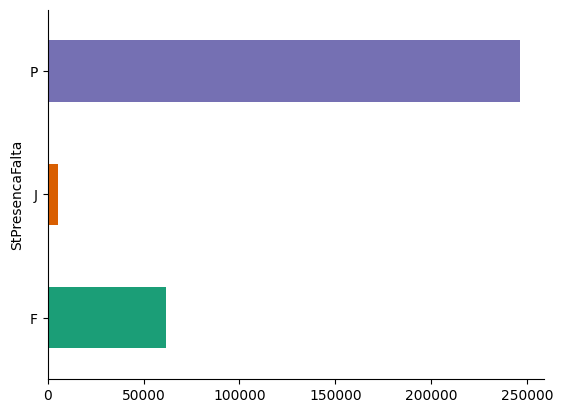

In [125]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('StPresencaFalta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)